In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [212]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import squarify
import seaborn as sns

## Product Analysis

In [217]:
products = pd.read_csv('category_product_sales.csv', delimiter=';')

products['TotalRevenue'] = products['TotalRevenue'].str.replace(',', '.').astype(float)
products['Year'] = [int(v[:4]) for v in products['Month'].values]
products['Month'] = [v[5:] for v in products['Month'].values]
products.head()

,Month,CategoryName,TotalRevenue,TotalTransaction,Year
0,August,Beverages,4866.880041,16,1996
1,August,Condiments,2296.599976,9,1996
2,August,Confections,5006.774976,10,1996
3,August,Dairy Products,4761.700035,13,1996
4,August,Grains/Cereals,270.599995,2,1996


In [221]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

products['Month'] = pd.Categorical(products['Month'], categories=months, ordered=True)
products = products.sort_values(by=['Year', 'Month']).reset_index(drop=True)
#products['YMonth'] = products['Year'] + '-' + products['Month']
products.head(2)

,Month,CategoryName,TotalRevenue,TotalTransaction,Year
0,July,Beverages,3182.500000,11,1996
1,July,Condiments,1878.200012,6,1996


###Pareto Chart

In [228]:
prod_pareto = products.drop(columns=['Month', 'Year']).copy()
prod_pareto = prod_pareto.groupby('CategoryName').sum()

prod_pareto

,TotalRevenue,TotalTransaction,CumpercRevenue,CumpercTransaction
CategoryName,,,,
Beverages,267868.180532,404,21.162084,18.747100
Condiments,106047.084985,216,29.540000,28.770302
Confections,167357.224837,334,42.761532,44.269142
Dairy Products,234507.285217,366,61.288042,61.252900
Grains/Cereals,95744.587472,196,68.852043,70.348028
Meat/Poultry,163022.359093,173,81.731112,78.375870
Produce,99984.580066,136,89.630079,84.686775
Seafood,131261.737426,330,100.000000,100.000000


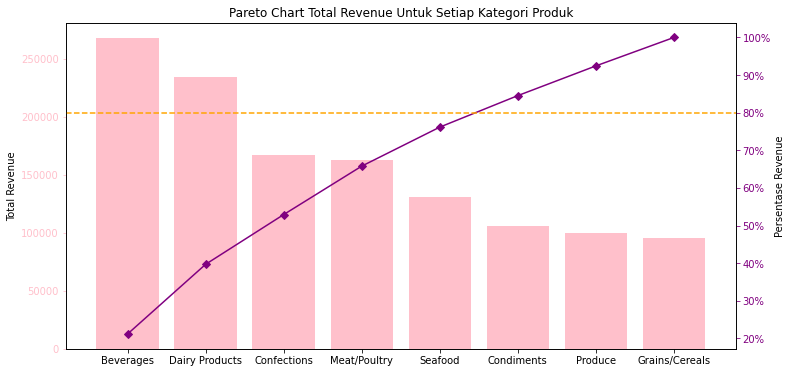

In [237]:
prod_pareto = prod_pareto.sort_values(by='TotalRevenue', ascending=False)
prod_pareto['CumpercRevenue'] = prod_pareto['TotalRevenue'].cumsum()/prod_pareto['TotalRevenue'].sum()*100

color1 = 'pink'
color2 = 'purple'
line_size = 6

fig, ax = plt.subplots()
ax.bar(prod_pareto.index, prod_pareto['TotalRevenue'], color=color1)
ax.set_ylabel('Total Revenue')

ax2 = ax.twinx()
ax2.plot(prod_pareto.index, prod_pareto['CumpercRevenue'], color=color2, marker="D", ms=line_size)
ax2.set_ylabel('Persentase Revenue')
ax2.axhline(80, color="orange", linestyle="dashed")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

fig.set_figwidth(12)
fig.set_figheight(6)

plt.title('Pareto Chart Total Revenue Untuk Setiap Kategori Produk')
plt.xlabel('Kategori Produk')


plt.show()

>Berdasarkan Pareto Rule dapat disimpulkan bahwa terdapat 2 kategori produk yang **paling mempengaruhi keuntungan yang diterima stakeholder** yaitu kategori Beverages dan Dairy Products. Stakeholder bisa fokus kepada kategori ini jika ingin meningkatkan keuntungan.

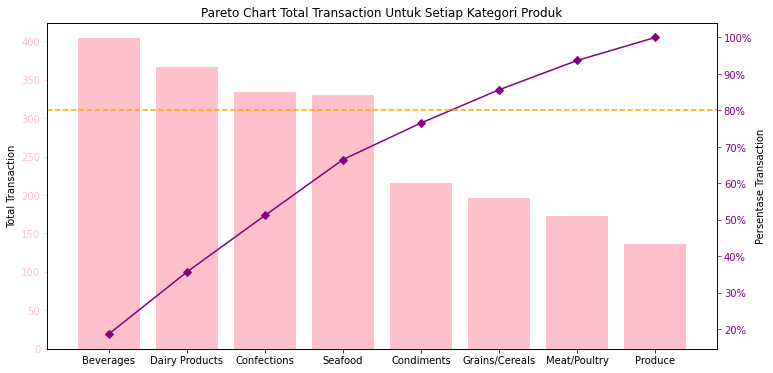

In [238]:
prod_pareto = prod_pareto.sort_values(by='TotalTransaction', ascending=False)
prod_pareto['CumpercTransaction'] = prod_pareto['TotalTransaction'].cumsum()/prod_pareto['TotalTransaction'].sum()*100

color1 = 'pink'
color2 = 'purple'
line_size = 6

fig, ax = plt.subplots()
ax.bar(prod_pareto.index, prod_pareto['TotalTransaction'], color=color1)
ax.set_ylabel('Total Transaction')

ax2 = ax.twinx()
ax2.plot(prod_pareto.index, prod_pareto['CumpercTransaction'], color=color2, marker="D", ms=line_size)
ax2.set_ylabel('Persentase Transaction')
ax2.axhline(80, color="orange", linestyle="dashed")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

fig.set_figwidth(12)
fig.set_figheight(6)

plt.title('Pareto Chart Total Transaction Untuk Setiap Kategori Produk')
plt.xlabel('Kategori Produk')


plt.show()

>Sedangkan untuk kategori produk yang **mempengaruhi banyaknya transaksi yang terjadi cukup bervariasi** yaitu kategori Beverages, Dairy Products, Confections, Seafood, Condiments dan Grains/Cereal. Stakeholder bisa fokus kepada kategori ini jika ingin meningkatkan banyaknya customer melakukan transaksi melalui perusahaan stakeholder.

###Category Trend

In [239]:
grouped = products.copy().groupby(['Year'])
prod_96 = grouped.get_group(1996).drop(columns='Year')
prod_97 = grouped.get_group(1997).drop(columns='Year')
prod_98 = grouped.get_group(1998).drop(columns='Year')
prod_96.head(2)

,Month,CategoryName,TotalRevenue,TotalTransaction
0,July,Beverages,3182.500000,11
1,July,Condiments,1878.200012,6


####Trend Revenue

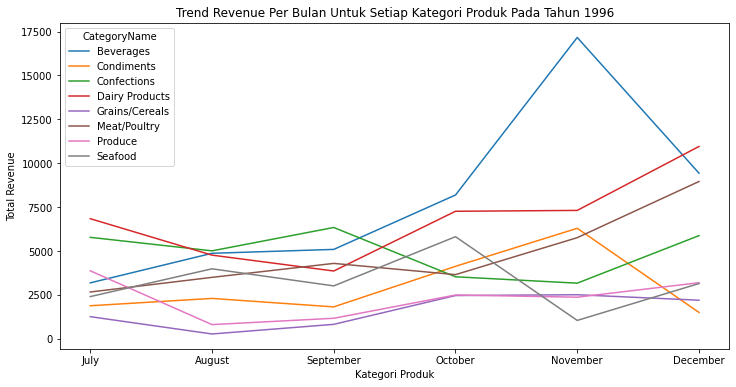

In [243]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data = prod_96, 
             x='Month', 
             y='TotalRevenue', 
             hue='CategoryName')

plt.title('Trend Revenue Per Bulan Untuk Setiap Kategori Produk Pada Tahun 1996')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Revenue')
plt.show()

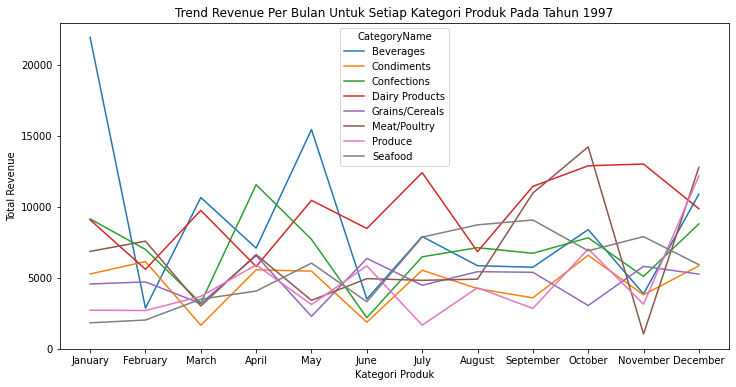

In [244]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data = prod_97, 
             x='Month', 
             y='TotalRevenue', 
             hue='CategoryName')

plt.title('Trend Revenue Per Bulan Untuk Setiap Kategori Produk Pada Tahun 1997')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Revenue')
plt.show()

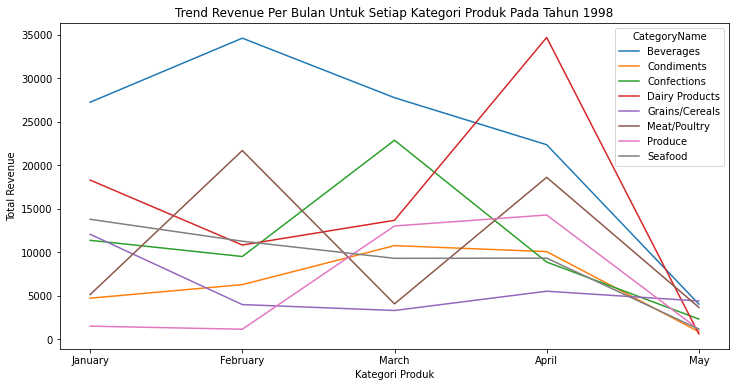

In [245]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data = prod_98, 
             x='Month', 
             y='TotalRevenue', 
             hue='CategoryName')

plt.title('Trend Revenue Per Bulan Untuk Setiap Kategori Produk Pada Tahun 1998')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Revenue')
plt.show()

-tahun 1996
  - beverage meningkat sampai november trus turun

####Trend Banyak Transaksi

In [248]:
prod_96.head()

,Month,CategoryName,TotalRevenue,TotalTransaction
0,July,Beverages,3182.500000,11
1,July,Condiments,1878.200012,6
2,July,Confections,5775.149902,8
3,July,Dairy Products,6838.340012,12
4,July,Grains/Cereals,1256.860004,5


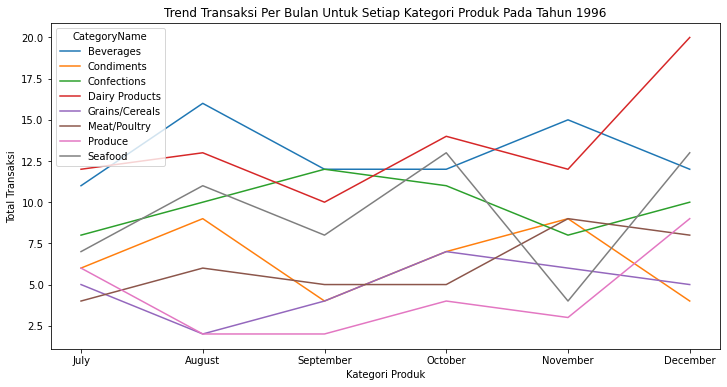

In [250]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data = prod_96, 
             x='Month', 
             y='TotalTransaction', 
             hue='CategoryName')

plt.title('Trend Transaksi Per Bulan Untuk Setiap Kategori Produk Pada Tahun 1996')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Transaksi')
plt.show()

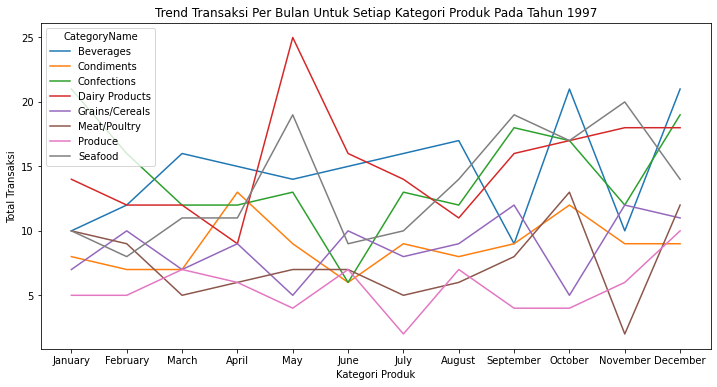

In [251]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data = prod_97, 
             x='Month', 
             y='TotalTransaction', 
             hue='CategoryName')

plt.title('Trend Transaksi Per Bulan Untuk Setiap Kategori Produk Pada Tahun 1997')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Transaksi')
plt.show()

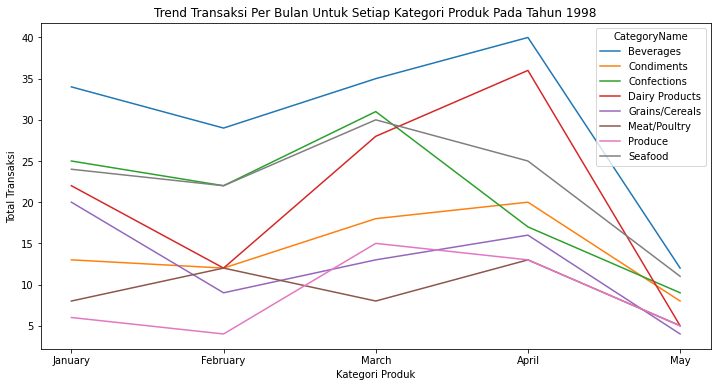

In [252]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data = prod_98, 
             x='Month', 
             y='TotalTransaction', 
             hue='CategoryName')

plt.title('Trend Transaksi Per Bulan Untuk Setiap Kategori Produk Pada Tahun 1998')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Transaksi')
plt.show()

## RFM Analysis

In [255]:
rfm = pd.read_csv('rfm_1997.csv', delimiter=';')

rfm['Monetary'] = rfm['Monetary'].str.replace(',', '.').astype(float)
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,BLONP,99,15,7817.879982
1,SEVES,1,14,9021.245075
2,OLDWO,76,9,5475.375000
3,THEBI,1,4,2955.400002
4,FRANS,0,6,249.699999


###Recency Segmentation

In [285]:
recency_count = {'Active': 0, 'Warm': 0, 'Cold': 0, 'Inactive': 0}
for row in rfm.itertuples(name='Pandas'):
  if row.Recency < 30:
    recency_count['Active'] += 1
  elif row.Recency < 90:
    recency_count['Warm'] += 1
  elif row.Recency < 180:
    recency_count['Cold'] += 1
  else:
    recency_count['Inactive'] += 1

recency_percen = {k: round(v/rfm.shape[0]*100,2) for k, v in recency_count.items()}
recency_percen

{'Active': 36, 'Warm': 24, 'Cold': 18, 'Inactive': 8}

In [305]:
labels = tuple(recency_percen.keys())
values = tuple(recency_percen.values())
colors = ('#0099FF', '#FF3333', '#F2DB00', '#FF9900')

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.1, 0, 0, 0])])
fig.update_traces( title="Recency Segmentation", hoverinfo='label+percent', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='white', width=1.5)))
fig.update_layout(autosize=False,width=450,height=350,margin=dict(l=10,r=10,b=10,t=10,pad=4),
   )
fig.show()

**Rekomendasi:**

- Active Segment: fokus untuk meningkatkan pembelian customer (cross/ up selling strategy.
- Warm Segment: fokus untuk meningkatkan repeat order (retention strategy)
- Cold Segment(beresiko churn): fokus untuk mengajak customer untuk berbelanja kembali (reactivation strategy, retention strategy)
- Inactive Segment: fokus untuk mengajak kembali customer (reactivation strategy 

###Square plot

In [295]:
def RScore(x):
    if x < 30:
        return 4
    elif x < 90:
        return 3
    elif x < 180: 
        return 2
    else:
        return 1

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

def rfm_level(df):
    if df['R_Score'] == df['F_Score'] == df['M_Score'] == 4:
        return 'Best Customers'
    elif df['R_Score'] >=3 and df['F_Score'] >= 2 and df['M_Score'] >= 3:
        return 'Potential Loyal Customers'
    elif df['F_Score'] == 1:
        return 'New Customers'
    else:
        return 'Risk Customers'

In [296]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])

rfm_segment = rfm.copy()
rfm_segment['R_Score'] = rfm_segment['Recency'].apply(RScore)
rfm_segment['F_Score'] = rfm_segment['Frequency'].apply(FMScore, args=('Frequency',quantiles))
rfm_segment['M_Score'] = rfm_segment['Monetary'].apply(FMScore, args=('Monetary',quantiles))
rfm_segment.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,BLONP,99,15,7817.879982,2,3,3
1,SEVES,1,14,9021.245075,4,3,4
2,OLDWO,76,9,5475.375000,3,2,3
3,THEBI,1,4,2955.400002,4,1,2
4,FRANS,0,6,249.699999,4,2,1


In [298]:
rfm_segment['RFM_segment'] = rfm_segment.R_Score.map(str) \
                            + rfm_segment.F_Score.map(str) \
                            + rfm_segment.M_Score.map(str)

rfm_segment['Customer_type'] = rfm_segment.apply(rfm_level, axis=1)
rfm_segment.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_segment,RFM_score,Customer_type
0,BLONP,99,15,7817.879982,2,3,3,233,8,Risk Customers
1,SEVES,1,14,9021.245075,4,3,4,434,11,Potential Loyal Customers
2,OLDWO,76,9,5475.375000,3,2,3,323,8,Potential Loyal Customers
3,THEBI,1,4,2955.400002,4,1,2,412,7,New Customers
4,FRANS,0,6,249.699999,4,2,1,421,7,Risk Customers


In [299]:
rfm_level_agg = rfm_segment.groupby('Customer_type').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)

df_rfm = rfm_level_agg.reset_index()
df_rfm = df_rfm.set_axis(['Customer_type', 'RecencyMean', 'FrequencyMean', 'MonetaryMean', 'Count'], axis=1, inplace=False)
df_rfm

,Customer_type,RecencyMean,FrequencyMean,MonetaryMean,Count
0,Best Customers,14.1,25.8,19596.9,12
1,New Customers,112.0,3.5,968.9,23
2,Potential Loyal Customers,28.8,16.5,10714.8,26
3,Risk Customers,93.3,9.6,3242.1,25


In [300]:
df_rfm['Percentage'] = round(df_rfm['Count'] / df_rfm['Count'].sum()*100, 2)
df_rfm['Percentage'] = df_rfm['Percentage'].astype('str')
df_rfm

,Customer_type,RecencyMean,FrequencyMean,MonetaryMean,Count,Percentage
0,Best Customers,14.1,25.8,19596.9,12,13.95
1,New Customers,112.0,3.5,968.9,23,26.74
2,Potential Loyal Customers,28.8,16.5,10714.8,26,30.23
3,Risk Customers,93.3,9.6,3242.1,25,29.07


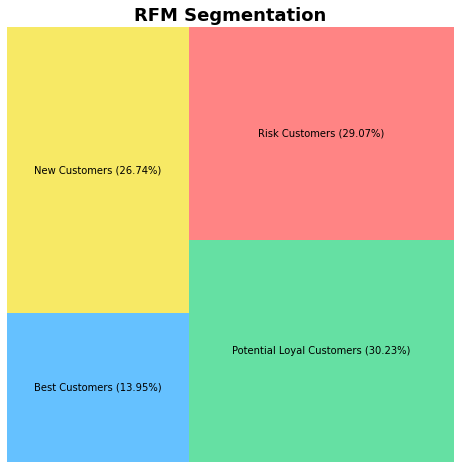

In [306]:
fig = plt.gcf()
ax = fig.add_subplot()

# squarify.plot(sizes = df_rfm['Count'], 
#               label = ['Best Customers','Get better deals for them','Loyal Customers','Need attention','Promising Customers'], alpha=.6,
#               color = ['#0099FF', '#F2DB00', '#00CC66', '#FF3333','#FF9900'])

squarify.plot(sizes = df_rfm['Count'], 
              label = df_rfm['Customer_type']+' ('+df_rfm['Percentage']+'%)', alpha=.6,
              color = ['#0099FF', '#F2DB00', '#00CC66', '#FF3333','#FF9900'])
fig.set_figwidth(8)
fig.set_figheight(8)
plt.title("RFM Segmentation", fontsize=18, fontweight="bold")
plt.axis('off')
plt.show()

**Rekomendasi:**

- Best Customer: Merupakan customer terbaik. Berikan ia hadiah. Jika kamu punya produk baru tawarkanlah kepada mereka.
- Potential Loyal Customer: Customer yang baru-baru ini baru bertransaksi, berbelanja dalam jumlah yang lumayan besar namun frekuensinya masih biasa-biasa saja. Berikanlah mereka rekomendasi produk yang tepat agar dapat meningkatkan frekuensi belanjanya.
- New Customer: Customer yang jarang berbelanja. Berikanlah mereka arahan/orientasi serta penawaran khusus agar dapat meningkatkan kunjungan mereka.
- Risk Customer: Customer yang sudah jarang bertransaksi dan memiliki peluang untuk churn rate yang tinggi. Kirimi mereka kampanye pengaktifan kembali yang dipersonalisasi untuk terhubung kembali, dan tawarkan pembaruan dan produk bermanfaat untuk mendorong pembelian kembali.

###Percentage of Recency, Frequency, Monetary among customer

In [302]:
labels = df_rfm['Customer_type']
values = df_rfm['RecencyMean']
colors = ['#0099FF', '#FF3333', '#00CC66', '#F2DB00','#FF9900']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.1, 0, 0,0])])
fig.update_traces( title="Recency among customers",hoverinfo='label+percent', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='white', width=1.5)))

fig.update_layout(autosize=False,width=450,height=350,margin=dict(l=10,r=10,b=10,t=10,pad=4),
   )
fig.show()

In [303]:
labels = df_rfm['Customer_type']
values = df_rfm['FrequencyMean']
colors = ['#0099FF', '#FF3333', '#F2DB00', '#FF9900','#00CC66']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.1, 0, 0, 0,0])])
fig.update_traces( title="Frequency among customers",hoverinfo='label+percent', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='white', width=1.5)))
fig.update_layout(autosize=False,width=450,height=350,margin=dict(l=10,r=10,b=10,t=10,pad=4),
   )
fig.show()

In [304]:
labels = df_rfm['Customer_type']
values = df_rfm['MonetaryMean']
colors = ['#0099FF', '#FF3333', '#F2DB00', '#FF9900','#00CC66']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.1, 0, 0, 0,0])])
fig.update_traces( title="Monetary Value",hoverinfo='label+percent', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='white', width=1.5)))
fig.update_layout(autosize=False,width=450,height=350,margin=dict(l=10,r=10,b=10,t=10,pad=4),
   )
fig.show()

>Dapat mengkombinasikan hasil segmentasi antara recency segmentation dan rfm segmentation untuk dapat menghasilkan promo/treatment yang lebih tepat sasaran

##Supplier Analysis

###Pareto Chart

In [309]:
supplier = pd.read_csv('supplier.csv', delimiter=';')

supplier['Revenue'] = supplier['Revenue'].str.replace(',', '.').astype(float)

supplier.head()

,CompanyName,Revenue
0,Aux joyeux ecclésiastiques,153691.27520
1,Plutzer Lebensmittelgroßmärkte AG,145372.39920
2,Gai pâturage,117981.18020
3,"Pavlova, Ltd.",106459.77550
4,"G'day, Mate",65626.77011


###Bar Chart

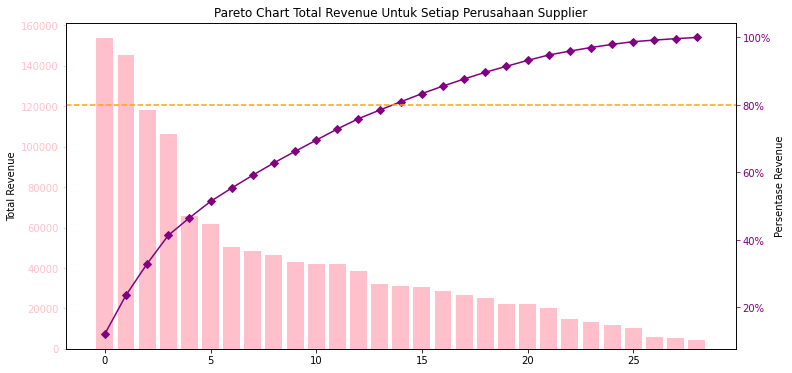

In [312]:
supplier = supplier.sort_values(by='Revenue', ascending=False)
supplier['CumpercRevenue'] = supplier['Revenue'].cumsum()/supplier['Revenue'].sum()*100

color1 = 'pink'
color2 = 'purple'
line_size = 6

fig, ax = plt.subplots()
ax.bar(supplier.index, supplier['Revenue'], color=color1)
ax.set_ylabel('Total Revenue')

ax2 = ax.twinx()
ax2.plot(supplier.index, supplier['CumpercRevenue'], color=color2, marker="D", ms=line_size)
ax2.set_ylabel('Persentase Revenue')
ax2.axhline(80, color="orange", linestyle="dashed")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

fig.set_figwidth(12)
fig.set_figheight(6)

plt.title('Pareto Chart Total Revenue Untuk Setiap Perusahaan Supplier')
plt.xlabel('Nama Perusahaan Supplier')


plt.show()

[Text(0.5, 1.0, 'Top Supplier Company')]

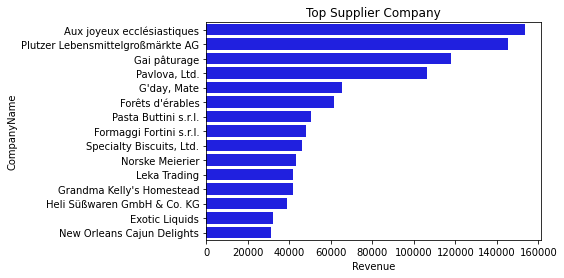

In [321]:
top_supplier = supplier.iloc[:15].copy()
sns.barplotx="Revenue", (y="CompanyName", data=top_supplier, color="b"). set(title="Top Supplier Company")

>Perusahaan bisa fokus untuk melakukan kerjasama dengan perusahaan-perusahaan supplier berikut.